In [1]:
# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Parte 1

#### 1) Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.

In [ ]:
def chromatic_mapping(image):
    # Convertir la imagen a espacio de color LAB
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # Obtener los canales de la imagen LAB
    L, A, B = cv2.split(lab_image)

    # Calcular media y desv estandar de los canales A y B
    mean_a = np.mean(A)
    std_a = np.std(A)
    mean_b = np.mean(B)
    std_b = np.std(B)

    # Aplicar el pasaje a coordenadas cromáticas
    A_prime = (A - mean_a) / std_a
    B_prime = (B - mean_b) / std_b

    # Unir los canales y convertir la imagen de nuevo a espacio de color BGR
    mapped_image = cv2.merge([L, np.uint8(A_prime), np.uint8(B_prime)])
    mapped_image = cv2.cvtColor(mapped_image, cv2.COLOR_LAB2BGR)

    return mapped_image

def plot_chromatic_mapping(path_to_image):
    # Importar la imagen
    input_image = cv2.imread(path_to_image)
    # Aplicar el algoritmo
    output_image = chromatic_mapping(input_image)
   
    # Plotear input vs output
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    plt.title('Imagen de entrada')
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    plt.title('Imagen de salida')
    plt.axis('off')
    plt.show()

In [ ]:
# Ejemplo 1
plot_chromatic_mapping(
    r'Material_TPs/TP1/coord_cromaticas/CoordCrom_1.png')

In [ ]:
# Ejemplo 2
plot_chromatic_mapping(
    r'Material_TPs/TP1/coord_cromaticas/CoordCrom_2.png')

In [ ]:
# Ejemplo 3
plot_chromatic_mapping(
    r'Material_TPs/TP1/coord_cromaticas/CoordCrom_3.png')

#### 2) Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

In [ ]:
def white_patch(image):
    B, G, R = cv2.split(image)

    max_r = np.amax(R)
    max_g = np.amax(G)
    max_b = np.amax(B)

    sr = 255 / max_r
    sg = 255 / max_g
    sb = 255 / max_b

    corrected_R = (R * sr).astype(np.uint8)
    corrected_G = (G * sg).astype(np.uint8)
    corrected_B = (B * sb).astype(np.uint8)

    corrected_image = cv2.merge([corrected_B, corrected_G, corrected_R])

    return corrected_image

def plot_white_patch(path_to_image):
    # Importar la imagen
    input_image = cv2.imread(path_to_image)
    # Aplicar el algoritmo
    output_image = white_patch(input_image)
   
    # Plotear input vs output
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    plt.title('Imagen de entrada')
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    plt.title('Imagen de salida')
    plt.axis('off')
    plt.show()

#### 3) Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

In [ ]:
plot_white_patch(
    r'Material_TPs/TP1/white_patch/test_blue.png')

In [ ]:
plot_white_patch(
    r'Material_TPs/TP1/white_patch/test_green.png')

In [ ]:
plot_white_patch(
    r'Material_TPs/TP1/white_patch/test_red.png')

In [ ]:
plot_white_patch(
    r'Material_TPs/TP1/white_patch/wp_blue.jpg')

In [ ]:
plot_white_patch(
    r'Material_TPs/TP1/white_patch/wp_green.png')

In [ ]:
plot_white_patch(
    r'Material_TPs/TP1/white_patch/wp_green2.jpg')

In [ ]:
plot_white_patch(
    r'Material_TPs/TP1/white_patch/wp_red.png')

In [ ]:
plot_white_patch(
    r'Material_TPs/TP1/white_patch/wp_red2.jpg')

Como podemos ver, en las primeras imagenes el algoritmo de white patch funciona muy bien pero en las imagenes *wp_* el algoritmo no funciona en absoluto. El gran problema de White Patch, es que asume que la fuente de luz dominante es blanca. Si la escena contiene fuentes de luz de diferentes colores (como es el caso de estas imagenes), la corrección de White Patch no va a funcionar practicamente.

## Parte 2

#### 1) Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas.

In [ ]:
# Leer las imagenes en escala de grises
img1 = cv2.imread(r'Material_TPs/TP1/img1_tp.png', 
                  cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(r'Material_TPs/TP1/img2_tp.png', 
                  cv2.IMREAD_GRAYSCALE)

# Visualizarlas en OpenCV (tengo una mac y no me funciona muy bien esto)
cv2.imshow('Imagen 1', img1)
cv2.imshow('Imagen 2', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 2) Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación detección de imágenes, considera que puede ser de utilidad tomar como 'features' a los histogramas?

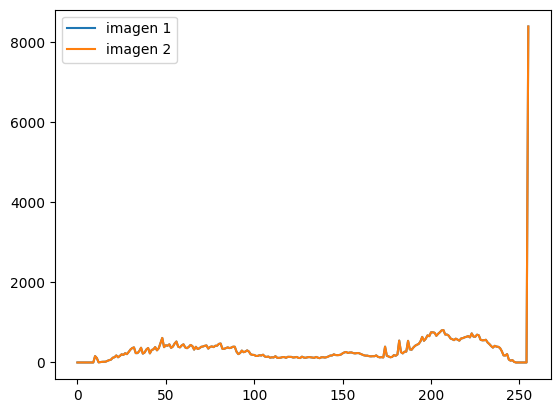

In [15]:
# Leer las imagenes en escala de grises
img1 = cv2.imread(r'Material_TPs/TP1/img1_tp.png', 
                  cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(r'Material_TPs/TP1/img2_tp.png', 
                  cv2.IMREAD_GRAYSCALE)

fig = plt.figure()
ax1=plt.subplot(111)
hist1,bins1 = np.histogram(img1.ravel(),256,[0,256])
ax1.plot(hist1, label = "imagen 1")

hist2,bins2 = np.histogram(img2.ravel(),256,[0,256])
ax1.plot(hist2, label = "imagen 2")

plt.legend(loc=0)
plt.show()


Ambos histogramas son exactamente iguales y estan concentrados en el color blanco (255). Considero que serian utiles para un modelo de clasificacion dado que muestran una fuerte concentracion sobre un espectro particular de luminosidad y color, esto podria ayudar a clasificar imagenes o elementos dentro de las imagenes.

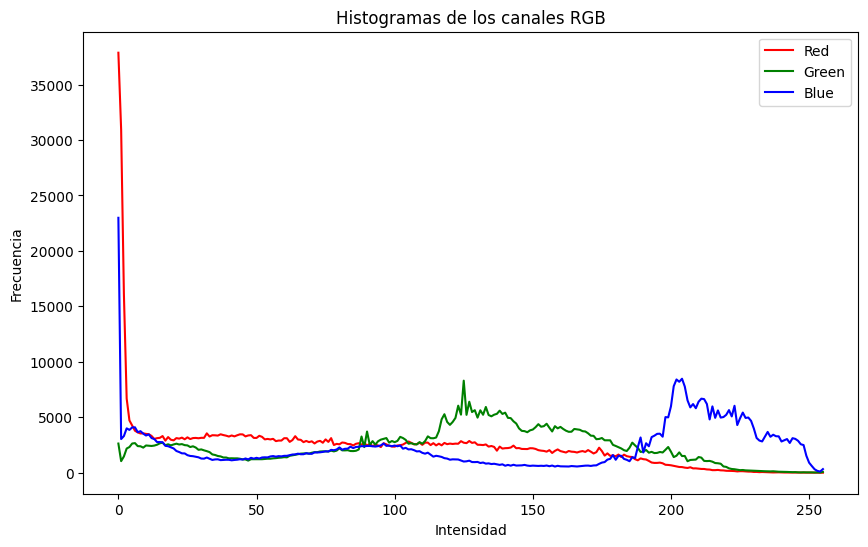

In [36]:
# Leer la imagen
img_color = cv2.imread(r'Material_TPs/TP1/segmentacion.png')

# Convertir la imagen de BGR a RGB
image_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

# Calcular los histogramas de los canales RGB
hist_r = cv2.calcHist([image_rgb], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([image_rgb], [1], None, [256], [0, 256])
hist_b = cv2.calcHist([image_rgb], [2], None, [256], [0, 256])

# Graficar los histogramas
plt.figure(figsize=(10, 6))
plt.plot(hist_r, color='r', label='Red')
plt.plot(hist_g, color='g', label='Green')
plt.plot(hist_b, color='b', label='Blue')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')
plt.title('Histogramas de los canales RGB')
plt.legend()
plt.show()

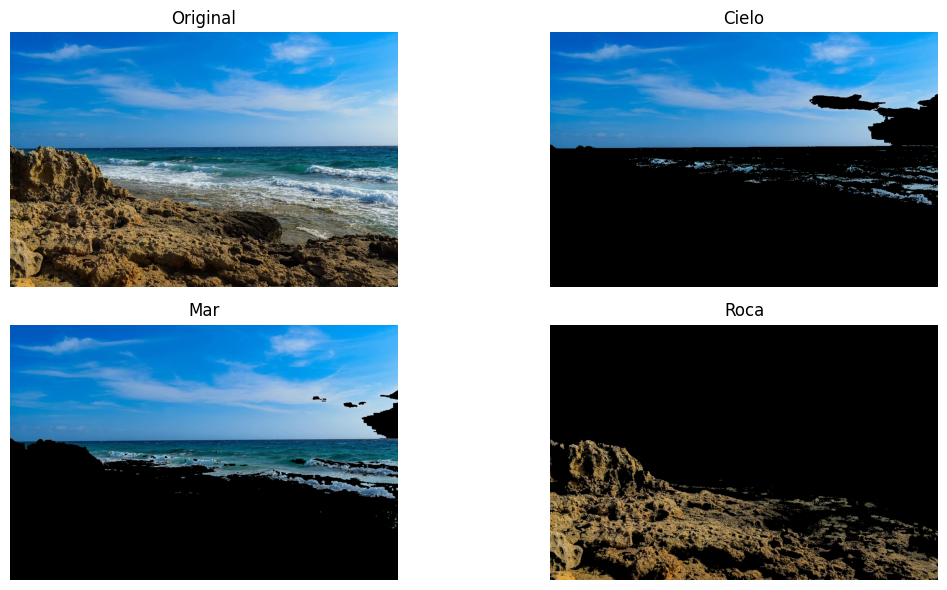

In [37]:
# Definir el rango de color para la segmentacion
lower_sky = np.array([75, 70, 150])
upper_sky = np.array([115, 255, 255])

lower_sea = np.array([90, 50, 50])
upper_sea = np.array([130, 255, 255])

lower_rock = np.array([0, 50, 50])
upper_rock = np.array([30, 255, 255])

# Convertir la imagen a espacio de color HSV
img_hsv = cv2.cvtColor(img_color, cv2.COLOR_BGR2HSV)

# Aplicar las máscara para segmentar
mask1 = cv2.inRange(img_hsv, lower_sky, upper_sky)
sky = cv2.bitwise_and(img_color, img_color, mask=mask1)

mask2 = cv2.inRange(img_hsv, lower_sea, upper_sea)
sea = cv2.bitwise_and(img_color, img_color, mask=mask2)

mask3 = cv2.inRange(img_hsv, lower_rock, upper_rock)
rock = cv2.bitwise_and(img_color, img_color, mask=mask3)

# Mostrar las imágenes
plt.figure(figsize=(12, 6))

# Imagen original
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

# Cielo
plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(sky, cv2.COLOR_BGR2RGB))
plt.title('Cielo')
plt.axis('off')

# Mar
plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(sea, cv2.COLOR_BGR2RGB))
plt.title('Mar')
plt.axis('off')

# Roca
plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(rock, cv2.COLOR_BGR2RGB))
plt.title('Roca')
plt.axis('off')

plt.tight_layout()
plt.show()


No pude mejorar la segmentacion de cielo y mar, es la que mas me costo por la similitud de colores.